In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/shrek69/my-dataset/train_cleaned/173.png
/kaggle/input/d/shrek69/my-dataset/train_cleaned/48.png
/kaggle/input/d/shrek69/my-dataset/train_cleaned/35.png
/kaggle/input/d/shrek69/my-dataset/train_cleaned/177.png
/kaggle/input/d/shrek69/my-dataset/train_cleaned/104.png
/kaggle/input/d/shrek69/my-dataset/train_cleaned/162.png
/kaggle/input/d/shrek69/my-dataset/train_cleaned/186.png
/kaggle/input/d/shrek69/my-dataset/train_cleaned/92.png
/kaggle/input/d/shrek69/my-dataset/train_cleaned/153.png
/kaggle/input/d/shrek69/my-dataset/train_cleaned/167.png
/kaggle/input/d/shrek69/my-dataset/train_cleaned/204.png
/kaggle/input/d/shrek69/my-dataset/train_cleaned/75.png
/kaggle/input/d/shrek69/my-dataset/train_cleaned/89.png
/kaggle/input/d/shrek69/my-dataset/train_cleaned/164.png
/kaggle/input/d/shrek69/my-dataset/train_cleaned/11.png
/kaggle/input/d/shrek69/my-dataset/train_cleaned/213.png
/kaggle/input/d/shrek69/my-dataset/train_cleaned/114.png
/kaggle/input/d/shrek69/my-dataset/tr

In [2]:
import numpy as np
import os
import cv2
import tensorflow.keras
import matplotlib.pyplot as plt

In [3]:
path='/kaggle/input/d/shrek69/my-dataset/'
path_working='/kaggle/working/'

In [4]:
train_img=sorted(os.listdir(path+'train/'))
clean_images=sorted(os.listdir(path+'train_cleaned'))
testImages=sorted(os.listdir(path+'test/'))

So I have tried to read the image but due to some error I was not able to read the image properly.So I have used a process function and this will help reshape the image and make it accessible to us

In [5]:
def proc_image(path):
    image=cv2.imread(path)
    image=np.asarray(image,dtype='float32')#float32 is normally used for the array images 
    image=cv2.resize(image,(540,520))
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)#convert rgb to gray or simply put one color space to another
    image=image/255.0
    image=np.reshape(image,(520,540,1))
    
    return image

In [6]:
###create the list required for the images
train=[]
clean_immages=[]
test_images=[]

for image in train_img:
    train.append(proc_image(path+'train/'+image))#giving path for each image
    
for image in clean_images:
    clean_immages.append(proc_image(path+'train_cleaned/'+image))#giving path for each image

for image in testImages:
    test_images.append(proc_image(path+'test/'+image))#giving path for each image

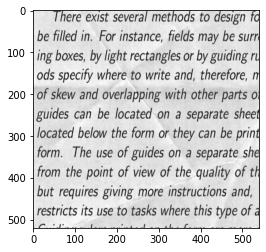

In [7]:
plt.imshow(train[0],cmap='gray')

## Lets see the actual unfiltered image with the side by side clean image

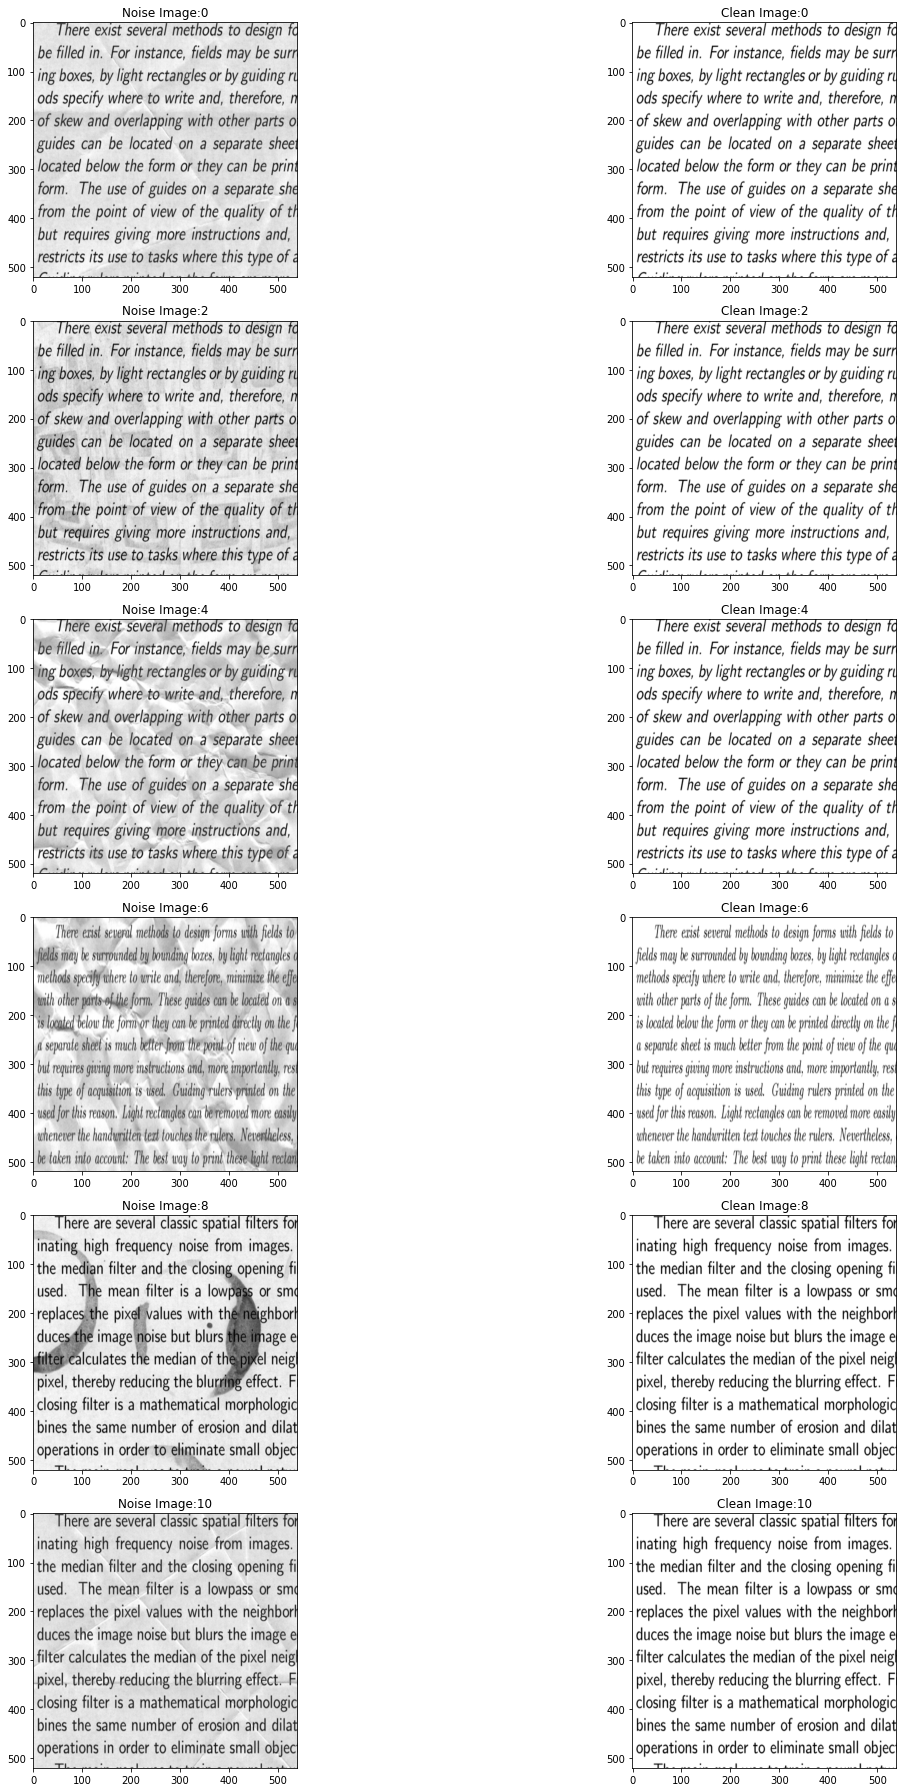

In [8]:
fig=plt.figure(figsize=(25,25))

for i in range(0,12,2):
    plt.subplot(6,2,i+1)
    plt.imshow(train[i],cmap='gray')
    plt.title('Noise Image:{}'.format(i))
    
    plt.subplot(6,2,i+2)
    plt.imshow(clean_immages[i],cmap='gray')
    plt.title('Clean Image:{}'.format(i))
    plt.tight_layout()
plt.show()

****Great so lets start with out model building now****

In [9]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization,UpSampling2D,Input
from tensorflow.keras import layers

In [10]:

input_layer=Input(shape=(520,540,1))

#encoder
x=Conv2D(64,(3,3),activation='relu' ,padding='same',kernel_initializer='he_normal')(input_layer)
x=MaxPooling2D((2,2),padding='same')(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=MaxPooling2D((2,2),padding='same')(x)

    
x=Dropout(0.4)(x)

#decoder
x=layers.Conv2DTranspose(64,(3,3),strides=2,activation='relu',padding='same')(x)
x=layers.Conv2DTranspose(64,(3,3),strides=2,activation='relu',padding='same')(x)
x=layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)


autoencoder=Model(inputs=[input_layer],outputs=[x])
autoencoder.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

2022-04-22 18:27:07.841737: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 18:27:07.946770: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 18:27:07.947483: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 18:27:07.948556: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [11]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 520, 540, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 520, 540, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 260, 270, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 260, 270, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 130, 135, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 130, 135, 64)      0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 260, 270, 64)      36928 

In [12]:
X_train=np.asarray(train)
Y_train=np.asarray(clean_immages)
X_test=np.asarray(test_images)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.2)

In [13]:
history=autoencoder.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,verbose=1)

2022-04-22 18:27:11.781856: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-04-22 18:27:13.313928: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
2022-04-22 18:27:20.309023: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.16GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-04-22 18:27:20.309081: W tensorflow/core/kernels/gpu_utils.cc:49] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.
2022-04-22 18:27:20.309231: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.16GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


4/4 [==============================] - 16s 2s/step - loss: 0.1714 - mae: 0.3936 - val_loss: 0.0773 - val_mae: 0.2369
Epoch 2/100
4/4 [==============================] - 2s 614ms/step - loss: 0.0717 - mae: 0.1648 - val_loss: 0.0730 - val_mae: 0.1131
Epoch 3/100
4/4 [==============================] - 2s 625ms/step - loss: 0.0762 - mae: 0.1129 - val_loss: 0.0752 - val_mae: 0.1088
Epoch 4/100
4/4 [==============================] - 2s 609ms/step - loss: 0.0772 - mae: 0.1112 - val_loss: 0.0755 - val_mae: 0.1084
Epoch 5/100
4/4 [==============================] - 2s 608ms/step - loss: 0.0774 - mae: 0.1111 - val_loss: 0.0755 - val_mae: 0.1084
Epoch 6/100
4/4 [==============================] - 2s 607ms/step - loss: 0.0774 - mae: 0.1110 - val_loss: 0.0756 - val_mae: 0.1083
Epoch 7/100
4/4 [==============================] - 2s 611ms/step - loss: 0.0774 - mae: 0.1110 - val_loss: 0.0756 - val_mae: 0.1083
Epoch 8/100
4/4 [==============================] - 2s 610ms/step - loss: 0.0774 - mae: 0.1110 - v

****Lets do a bit of plotting now****

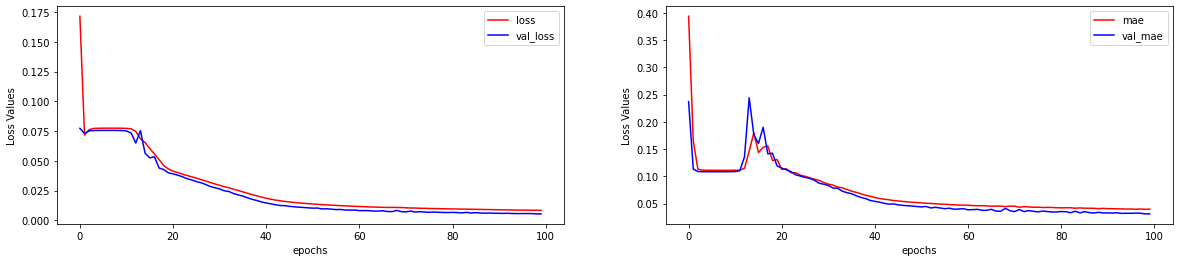

In [14]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='blue')
plt.xlabel('epochs')
plt.ylabel('Loss Values')
plt.legend(['loss','val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['mae'],color='red')
plt.plot(history.history['val_mae'],color='blue')
plt.xlabel('epochs')
plt.ylabel('Loss Values')
plt.legend(['mae','val_mae'])

In [15]:
Y_test=autoencoder.predict(X_test)

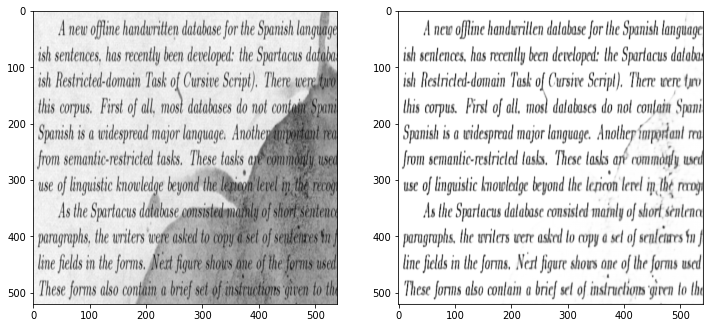

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(X_test[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(Y_test[0],cmap='gray')

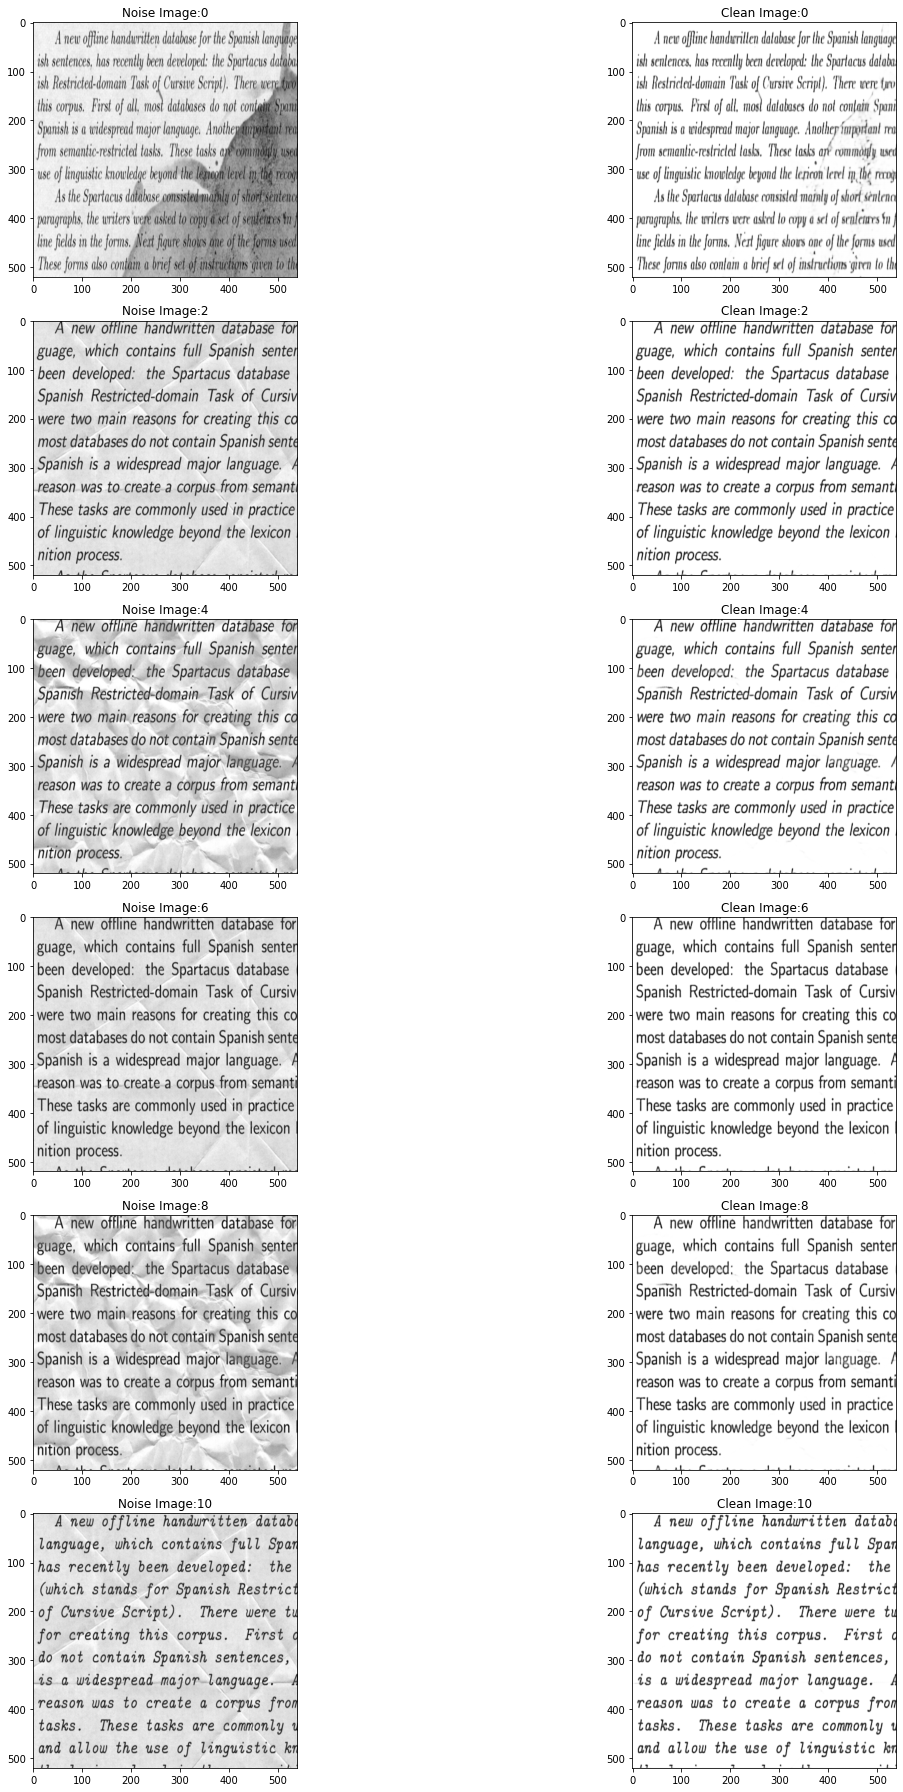

In [17]:
fig=plt.figure(figsize=(25,25))

for i in range(0,12,2):
    plt.subplot(6,2,i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.title('Noise Image:{}'.format(i))
    
    plt.subplot(6,2,i+2)
    plt.imshow(Y_test[i],cmap='gray')
    plt.title('Clean Image:{}'.format(i))
    plt.tight_layout()
plt.show()